## Overview of the dataset
Here I will load the trial summary tables that include codes associated with Subjects and Activities

Subjects are grouped as follows

    SA: Adults subjects between 19 and 30 years old
    SE: Elderly people between 60 and 75 years old
    
Activities are grouped as follows

    F: Falls
    A: Activities of daily life (ADL)
    
First, let's get the summaries of that data.

In [1]:
import pandas as pd
import os

def load_summary_as_df(fname):
    df = pd.read_csv(fname, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()
    for col in df.columns:
        if df[col].dtype.kind not in 'biufc':
            df[col] = df[col].str.strip()
    df.sort_values('ID')
    return df

subjects = load_summary_as_df("Subjects.txt")
activity = load_summary_as_df("Activities.txt")

In [2]:
subjects

,ID,Age,Height,Weight,Gender
0,SA01,26,165,53.0,F
1,SA02,23,176,58.5,M
2,SA03,19,156,48.0,F
3,SA04,23,170,72.0,M
4,SA05,22,172,69.5,M
5,SA06,21,169,58.0,M
6,SA07,21,156,63.0,F
7,SA08,21,149,41.5,F
8,SA09,24,165,64.0,M
9,SA10,21,177,67.0,M


In [3]:
activity

,ID,Activity,Trials,Duration
0,D01,Walking slowly,1,100s
1,D02,Walking quickly,1,100s
2,D03,Jogging slowly,1,100s
3,D04,Jogging quickly,1,100s
4,D05,Walking upstairs and downstairs slowly,5,25s
5,D06,Walking upstairs and downstairs quickly,5,25s
6,D07,"Slowly sit in a half height chair, wait a mome...",5,12s
7,D08,"Quickly sit in a half height chair, wait a mom...",5,12s
8,D09,"Slowly sit in a low height chair, wait a momen...",5,12s
9,D10,"Quickly sit in a low height chair, wait a mome...",5,12s


Previously, I labeled the t-series datasets and saved them as pickles, so now I will reload them all available combinations of subjects and activities.

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt

trial_dict = {}
for _s in subjects.ID:
    for _a in activity.ID:
        dpath = os.path.abspath(_s)
        fpath = os.path.join(dpath,_a)
        files = glob.glob("%s*.pkl" % fpath)
        if len(files) > 0:
            trial_dict[_s,_a] = []
            for _f in files:
                _t = os.path.split(_f)[-1].split('_')[-1].split('.')[0]
                trial_dict[_s,_a].append(_t)
            trial_dict[_s,_a].sort()
#         print(_s, _a, "has", len(trial_dict[_s,_a]), "trials")
total = 0
for key in trial_dict:
    total += len(trial_dict[key])

print("%8i unique subject-activity cases" % len(trial_dict))
print("%8i unique trials" % total)

     983 unique subject-activity cases
    4310 unique trials


Using `trial_dict` I can then count the total number of trials and access specific lists of trials for a given `trial_dict` key that is the pair of subject and activity IDs.

983 entries
4310 trials
0 entries without trials


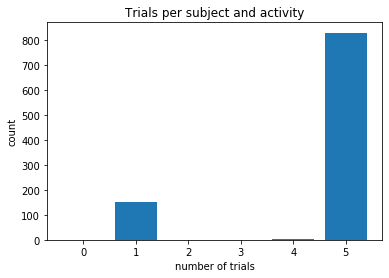

In [3]:
total = 0
notrial = 0
n_trials = [[], []]
for key in trial_dict.keys():
    _nt = len(trial_dict[key])
    total += _nt
    n_trials[0].append(_nt)
    if n_trials == 0:
        notrial += 1
print(len(trial_dict.keys()), "entries")
print(total, "trials")
print(notrial, "entries without trials")

n_trials = np.array(n_trials)
plt.hist(n_trials[0], bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5], 
         rwidth = 0.8, align='mid')
plt.title("Trials per subject and activity")
plt.xlabel("number of trials")
plt.ylabel("count")
plt.show()

We need a consistent way to get the filepath, so here's a function for that:

In [4]:
def fpath(sub,act,trial, ext='pkl'):
    _fn = "%s_%s_%s.%s" % (act,sub,trial,ext)
    _fp = os.path.abspath(sub)
    _fp = os.path.join(_fp,_fn)
    print(_fp)
    return _fp

def age_of_subject(subject_id):
    return int(subjects[subjects.ID == subject_id].Age)

def activity_str(activity_id):
    return activity.loc[activity.ID == activity_id]['Activity'].values[0]

Let's now go through and extract the data and the features just for the pitch, yaw, and roll.

In [5]:
data_set = []
for SubAct in trial_dict:
    for trial in trial_dict[SubAct]:
        df = pd.read_pickle(fpath(SubAct[0],SubAct[1],trial))
        data_set.append(df)

# sub = 'SA03'
# act = 'F13'
# df = pd.read_pickle(fpath(sub,act,trial_dict[sub,act][0]))
# # df = df.drop(columns=['ax2','ay2','az2'])
# df['no_fall'] = df['label'] == 0
# df['prefall'] = df['label'] == 1
# df['midfall'] = df['label'] == 2
# types = { 'no_fall': 'int32',
#           'prefall': 'int32',
#           'midfall': 'int32' }

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D01_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D02_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D03_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D04_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D05_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D05_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D05_SA01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D05_SA01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D05_SA01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D06_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/D06_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D11_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D11_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D12_SA02_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D12_SA02_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D12_SA02_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D12_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D12_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D13_SA02_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D13_SA02_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D13_SA02_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D13_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/D01_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/D02_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/D03_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/D04_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/D05_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/D05_SA03_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/D05_SA03_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F04_SA03_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F05_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F05_SA03_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F05_SA03_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F05_SA03_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F05_SA03_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F06_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F06_SA03_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F06_SA03_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F06_SA03_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F06_SA03_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F13_SA04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F14_SA04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F14_SA04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F14_SA04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F14_SA04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F14_SA04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F15_SA04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F15_SA04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F15_SA04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F15_SA04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F15_SA04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D08_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D09_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D09_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D09_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D09_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D09_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D10_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D10_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D10_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D10_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D10_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F10_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F10_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F10_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F10_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F10_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F11_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F11_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F11_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F11_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F11_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F12_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D05_SA08_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D06_SA08_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D06_SA08_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D06_SA08_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D06_SA08_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D06_SA08_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D07_SA08_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D07_SA08_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D07_SA08_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D07_SA08_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D07_SA08_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D15_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D15_SA09_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D15_SA09_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D16_SA09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D16_SA09_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D16_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D16_SA09_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D16_SA09_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D17_SA09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D17_SA09_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/D17_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D02_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D03_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D04_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D05_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D05_SA10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D05_SA10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D05_SA10_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D05_SA10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D06_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D06_SA10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D06_SA10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D07_SA11_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D08_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D08_SA11_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D08_SA11_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D08_SA11_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D08_SA11_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D09_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D09_SA11_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D09_SA11_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D09_SA11_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/D09_SA11_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F09_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F09_SA11_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F09_SA11_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F09_SA11_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F09_SA11_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F10_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F10_SA11_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F10_SA11_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F10_SA11_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F10_SA11_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F11_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F14_SA12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F14_SA12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F14_SA12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F14_SA12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA13/D01_SA13_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA13/D02_SA13_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D10_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D10_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/D19_SA15_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F01_SA15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F01_SA15_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F01_SA15_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F01_SA15_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F01_SA15_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F02_SA15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F02_SA15_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F02_SA15_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F02_SA15_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA15/F02_SA15_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F08_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F09_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F09_SA16_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F09_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F09_SA16_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F09_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F10_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F10_SA16_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F10_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F10_SA16_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F10_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D18_SA17_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D18_SA17_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D18_SA17_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D18_SA17_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D19_SA17_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D19_SA17_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D19_SA17_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D19_SA17_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/D19_SA17_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/F01_SA17_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA17/F01_SA17_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F07_SA18_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F07_SA18_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F07_SA18_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F07_SA18_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F07_SA18_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F08_SA18_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F08_SA18_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F08_SA18_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F08_SA18_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F08_SA18_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F09_SA18_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA19/F15_SA19_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA19/F15_SA19_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA19/F15_SA19_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA19/F15_SA19_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D01_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D02_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D03_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D04_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D05_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D05_SA20_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D05_SA20_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D09_SA21_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D10_SA21_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D10_SA21_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D10_SA21_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D10_SA21_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D10_SA21_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D11_SA21_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D11_SA21_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D11_SA21_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D11_SA21_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/D11_SA21_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F12_SA21_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F12_SA21_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F12_SA21_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F12_SA21_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F13_SA21_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F13_SA21_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F13_SA21_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F13_SA21_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F13_SA21_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F14_SA21_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA21/F14_SA21_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D04_SA23_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D05_SA23_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D05_SA23_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D05_SA23_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D05_SA23_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D05_SA23_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D06_SA23_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D06_SA23_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D06_SA23_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D06_SA23_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA23/D06_SA23_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D15_SE01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D15_SE01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D15_SE01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D15_SE01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D15_SE01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D16_SE01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D16_SE01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D16_SE01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D16_SE01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D16_SE01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D17_SE01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D08_SE05_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D08_SE05_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D08_SE05_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D09_SE05_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D09_SE05_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D09_SE05_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D09_SE05_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D09_SE05_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D10_SE05_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D10_SE05_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE05/D10_SE05_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D03_SE07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D04_SE07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D05_SE07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D05_SE07_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D05_SE07_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D05_SE07_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D05_SE07_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D07_SE07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D07_SE07_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D07_SE07_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE07/D07_SE07_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D10_SE10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D10_SE10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D10_SE10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D10_SE10_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D10_SE10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D11_SE10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D11_SE10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D11_SE10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D11_SE10_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D11_SE10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE10/D12_SE10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D12_SE13_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D15_SE13_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D15_SE13_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D15_SE13_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D15_SE13_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D15_SE13_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D16_SE13_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D16_SE13_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D16_SE13_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D16_SE13_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE13/D16_SE13_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

In [6]:
np.random.seed()

def grab_window(df, f_window=256, fps=200):
    f_start = np.random.randint(0, len(df)-f_window)
    _data = data_set[0][f_start:f_start+f_window]
    _data = _data.reset_index()
    t0 = _data['t'].values[0]
    _data['t'] = _data['t'].apply(lambda t: t - t0)
    del _data['index',]
    return _data

In [105]:
clips = []
n_samples = int(12*200/256)
n_samples = 1
i_entry = 0
for entry in data_set:
    if len(entry) > 0:
        for i in range(n_samples):
            try:
                clips.append(grab_window(entry).values)
                print(" Clip %5i" % i_entry, end='\r')
                i_entry += 1
            except:
                continue

## use this one!! 

In [212]:
np.random.seed()

def grab_window(df, f_window=256, fps=200):
    f_start = np.random.randint(0, len(df)-f_window)
    _data = data_set[0][f_start:f_start+f_window]
    _data = _data.reset_index()
    del _data['index'], _data['t']
    # create window label here
    h, be = np.histogram(_data['label'], bins=3)
    _label = np.array(np.array(h/f_window/0.33, dtype = bool), dtype=int)
#     print(_data.values[:,:6])
    return _data.values[:,:6], list(_label)

grab_window(entry)

(array([[70, -255, -58, 244, -286, 79],
        [80, -252, -49, 177, -272, 116],
        [80, -251, -39, 124, -261, 149],
        ...,
        [43, -276, -80, 557, -421, 81],
        [60, -270, -78, 534, -398, 130],
        [74, -258, -73, 476, -366, 175]], dtype=object),
 [0, 1, 0])

In [223]:
clips = []
labels = []
n_samples = int(12*200/256)
i_entry = 0
for entry in data_set:
    if len(entry) > 0:
        for i in range(n_samples):
#             try:
                _clip, _label = grab_window(entry)
                if len(_clip) == 256:
                    clips.append(_clip)
                    labels.append([_label])
                    i_entry += 1
                    print(" Clip %5i" % i_entry, end='\r')
#             except:
#                 continue

In [215]:
_label

[0, 1, 0]

In [224]:
clips

[array([[6, -234, 12, -109, -377, 98],
        [4, -236, 17, -102, -386, 117],
        [-1, -240, 17, -90, -393, 135],
        ...,
        [11, -223, 14, 10, -342, 18],
        [11, -224, 17, 1, -355, 45],
        [9, -226, 20, -1, -372, 71]], dtype=object),
 array([[10, -234, -14, -65, -277, -469],
        [5, -241, -15, -62, -271, -466],
        [11, -249, -5, -56, -271, -461],
        ...,
        [-1, -235, 3, -109, -866, -200],
        [0, -231, 18, -90, -873, -165],
        [6, -232, 12, -44, -883, -129]], dtype=object),
 array([[-17, -287, -65, 1, -156, 700],
        [-22, -280, -97, 56, -152, 666],
        [-26, -267, -109, 99, -144, 639],
        ...,
        [16, -302, -26, -135, -129, 727],
        [4, -300, -46, -119, -85, 665],
        [-3, -297, -67, -95, -54, 608]], dtype=object),
 array([[-4, -216, -37, 82, -391, -342],
        [-2, -215, -36, 60, -409, -343],
        [2, -216, -29, 46, -434, -347],
        ...,
        [-6, -242, 43, 165, -813, 60],
        [-5, -253,

In [226]:
# clips = np.asarray(clips)
# clips[0].shape
# for clip in clips:
#     if clip.shape != (256,6):
#         print("Incorrect shape")
#         print(clip.shape)
# signals = clips[:,:,:6].astype(np.float32)
clips = np.asarray(clips, dtype=np.float32)
labels = np.asarray(labels)
clips.shape, labels.shape

((38769, 256, 6), (38769, 1, 3))

In [227]:
shuffle = np.random.permutation(len(clips))
signals = clips[shuffle]
labels = labels[shuffle]
signals.shape, labels.shape

((38769, 256, 6), (38769, 1, 3))

In [228]:
print("Signals: ", signals.shape)
print("Labels:  ", labels.shape)

Signals:  (38769, 256, 6)
Labels:   (38769, 1, 3)


In [229]:
import tensorflow as tf

signals = tf.convert_to_tensor(signals)
labels = tf.convert_to_tensor(labels)

ratio = 0.8
cutoff = int(len(signals)*ratio)

train_signals, train_labels = signals[:cutoff], labels[:cutoff]
test_signals, test_labels   = signals[cutoff:], labels[cutoff:]

print("Train signals:", train_signals.shape)
print("Train labels: ", train_labels.shape)
print("Test signals: ", test_signals.shape)
print("Test labels:  ", test_labels.shape)

n_timesteps = train_signals.shape[1]
n_features = train_signals.shape[2]
n_outputs = 3

Train signals: (31015, 256, 6)
Train labels:  (31015, 1, 3)
Test signals:  (7754, 256, 6)
Test labels:   (7754, 1, 3)


In [241]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# keras.Input(shape=train_signal)
TIME_PERIODS = n_timesteps
num_sensors = n_features
num_classes = n_outputs

model = models.Sequential()

model.add(layers.Conv1D(kernel_size=3, 
                        filters=64, 
                        activation='relu', 
                        input_shape=(TIME_PERIODS, num_sensors)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(60))
model.add(layers.Dropout(0.5))

# model.add(layers.Conv1D(kernel_size = 1, 
#                         filters = 1920, 
#                         activation='relu'))

# model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(512))


model.add(layers.Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_191 (Conv1D)          (None, 254, 64)           1216      
_________________________________________________________________
batch_normalization_171 (Bat (None, 254, 64)           256       
_________________________________________________________________
max_pooling1d_171 (MaxPoolin (None, 127, 64)           0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 127, 64)           0         
_________________________________________________________________
conv1d_192 (Conv1D)          (None, 125, 64)           12352     
_________________________________________________________________
batch_normalization_172 (Bat (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_172 (MaxPoolin (None, 62, 64)          

In [63]:
tf.keras.__version__

'2.3.0-tf'

In [242]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
history = model.fit(train_signals, train_labels, 
                    epochs = 10, 
                    batch_size = 128,
                    validation_data=(test_signals, test_labels))

Epoch 1/10
243/243 [==============================] - 26s 109ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 3.0951e-06 - val_accuracy: 1.0000
Epoch 2/10
243/243 [==============================] - 27s 109ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 5.4019e-06 - val_accuracy: 1.0000
Epoch 3/10
243/243 [==============================] - 26s 106ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 5.6242e-06 - val_accuracy: 1.0000
Epoch 4/10
243/243 [==============================] - 25s 104ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 5.7104e-06 - val_accuracy: 1.0000
Epoch 5/10
243/243 [==============================] - 26s 105ms/step - loss: 1.1922e-07 - accuracy: 1.0000 - val_loss: 5.6806e-06 - val_accuracy: 1.0000
Epoch 6/10
243/243 [==============================] - 26s 106ms/step - loss: 1.1923e-07 - accuracy: 1.0000 - val_loss: 5.6463e-06 - val_accuracy: 1.0000
Epoch 7/10
243/243 [==============================] - 27s 112ms/step - loss: 1.1921e-0

243/243 - 2s - loss: 5.5987e-06 - accuracy: 1.0000


(5.5987238738453016e-06, 1.0)

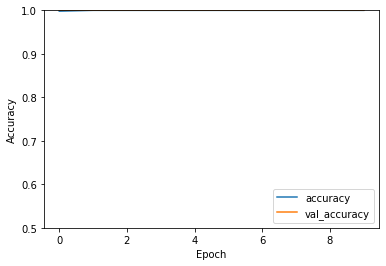

In [245]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_signals,  test_labels, verbose=2)
test_loss, test_acc

## Defining a container class
Here, I'll make a container for this class based on the data label.

In [ ]:
class Trials:
    
    def __init__(self, trials = [], name = None):
        if len(trials)
        self.trials = trials
        self.name = name
        
    def print_all_trials(self):
        print(self.name)
        for trial in self.trials:
            trial.print_info()
            print("\n")
    # first, gather all of the relevant files
    files = {}
    dirs = !ls | grep SA

    for dir in dirs:
        print(dir)
        files[dir] = !ls {dir}

    for dir in dirs:
        for file in files[dir]:
            _fn = "%s/%s" % (dir, file)
            if _fn.split('.')[-1] == "txt":
                print(_fn)

    pd.read_csv(_fn, header = None)

In [ ]:
ts = [t1,t2,t3]

In [ ]:
tset = Trials(ts)

In [ ]:
tset.print_all_trials()

In [ ]:
files = {}
dirs = !ls | grep SA
for dir in dirs:
    files[dir] = !ls {dir}